# Finger 1: Análisis de datos de eventos en Trocafone

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [185]:
events = pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv')

In [186]:
# Primer vistazo al DataFrame
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# Dimensiones del DataFrame
print (events.shape)

(1011288, 23)


## 1: Tipo de evento predominante en el set de datos

In [188]:
# Verifico que no hay registros que no tienen event cargado en el DataFrame
print (events['event'].size == events['event'].count())

True


In [189]:
print (events['event'].value_counts().head(1)) 

viewed product    528931
Name: event, dtype: int64


In [190]:
events_count = events['event'].value_counts()

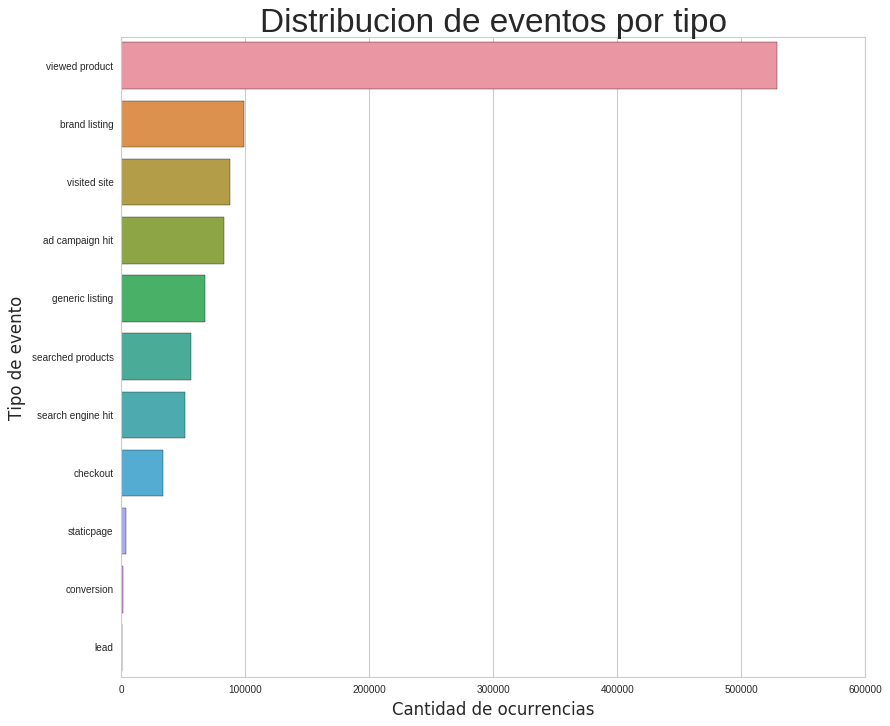

In [191]:
plt.figure(figsize = [12,10])
visu1 = sns.barplot(x=events_count.values, y=events_count.index, orient='h')
plt.xlabel("Cantidad de ocurrencias", fontsize=15)
plt.ylabel("Tipo de evento", fontsize=15)
plt.title("Distribucion de eventos por tipo", fontsize=30)
plt.tick_params(labelsize=9)
plt.show(visu1)

## 2: Top 5 productos (identificados por sku) con mayor cantidad de conversiones

In [192]:
events_conversion = events.loc[events['event'] == 'conversion']

In [193]:
# Verifico que no hay registros que no tienen sku cargado en el DataFrame de Conversions
print (events_conversion['sku'].size == events_conversion['sku'].count())

True


In [194]:
top_products = events_conversion['sku'].value_counts().sort_values(ascending=False)[:5]
print (top_products)

6371    29
6370    18
7631    17
2692    16
3371    14
Name: sku, dtype: int64


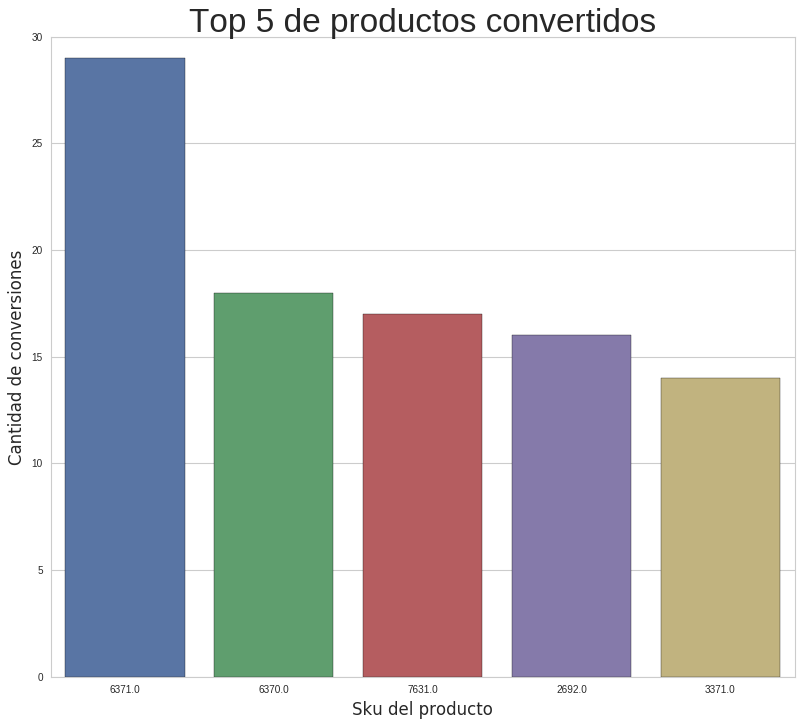

In [195]:
plt.figure(figsize = [12,10])
visu1 = sns.barplot(y=top_products.values, x=top_products.index, orient='v', order=top_products.index.unique())
plt.ylabel("Cantidad de conversiones", fontsize=15)
plt.xlabel("Sku del producto", fontsize=15)
plt.title("Top 5 de productos convertidos", fontsize=30)
plt.tick_params(labelsize=9)
plt.show(visu1)

## 3 : Top 10 usuarios que registraron más actividad en la plataforma (realizaron más eventos)

In [196]:
# Verifico que no hay registros que no tienen user cargado en el DataFrame
print (events['person'].size == events['person'].count())

True


In [197]:
users_grouped = events.groupby('person').agg('count')
top_10_users = users_grouped['timestamp'].sort_values(ascending = False)[:10]
print top_10_users

person
71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: timestamp, dtype: int64


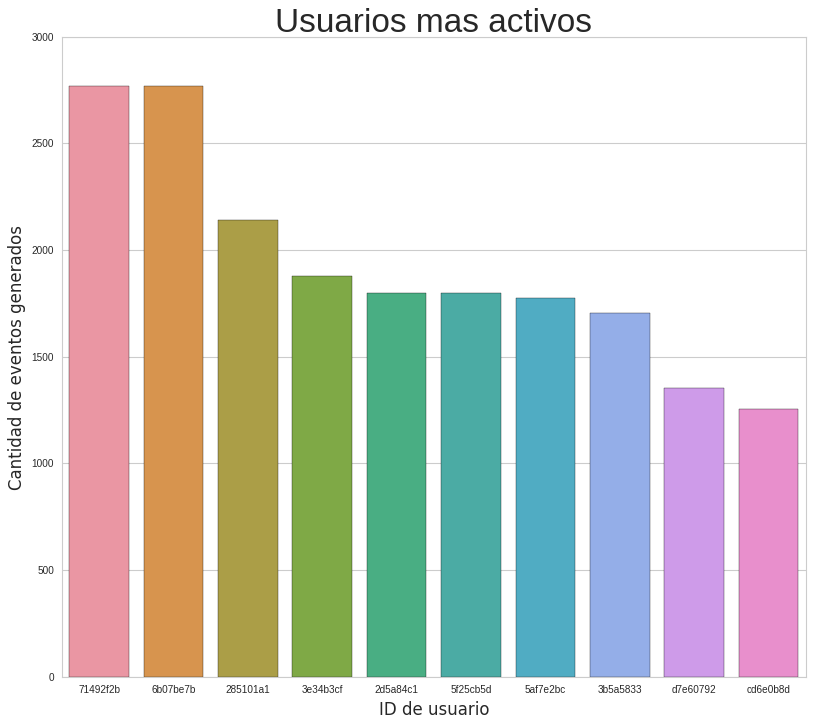

In [198]:
plt.figure(figsize = [12,10])
visu1 = sns.barplot(y=top_10_users.values, x=top_10_users.index, orient='v')
plt.ylabel("Cantidad de eventos generados", fontsize=15)
plt.xlabel("ID de usuario", fontsize=15)
plt.title("Usuarios mas activos", fontsize=30)
plt.tick_params(labelsize=9)
plt.show(visu1)